In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

import warnings
warnings.filterwarnings("ignore")

In [2]:
words_corpus = pd.read_csv('/content/preprocessed_PCA_newdf.xls')
words_corpus.head()

,Unnamed: 0,Feature-1,Feature-2,Feature-3,Feature-4,Feature-5,Feature-6,Feature-7,Feature-8,Feature-9,Feature-10,Word
0,0,-0.135994,0.700704,-0.243845,-0.206682,0.012245,-0.134163,-0.034946,-0.000948,-0.006617,-0.013265,AFRAID
1,1,-0.164038,0.618974,-0.239514,-0.225620,-0.008237,-0.104077,0.035675,-0.012855,0.037187,-0.017356,AFRAID
2,2,-0.657468,-0.421108,-0.262696,0.028364,-0.147318,-0.037199,0.045543,-0.030400,-0.004434,-0.017793,AFRAID
3,3,-0.494670,-1.286647,-0.145833,0.209014,-0.183054,0.073933,0.122878,0.001645,0.105372,-0.058780,AFRAID
4,4,0.027746,-0.361878,-0.233952,-0.186101,-0.093658,0.032019,0.083742,0.005980,0.026283,-0.025037,AFRAID


In [3]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

print(device)

cuda


In [4]:
words_corpus.shape

(13540, 12)

In [5]:
words_corpus.drop(["Unnamed: 0"], inplace=True, axis=1)

In [6]:
words_corpus.shape

(13540, 11)

In [7]:
words_corpus["Word"].value_counts()

,count
Word,
Z,200
9,200
H,200
G,200
F,200
...,...
HURT,75
HUNGRY,75
HOW,75


In [ ]:
# filtered_words_df = words_corpus[words_corpus["Word"].map(words_corpus["Word"].value_counts()) <= 20]

In [8]:
words_corpus["Word"].unique()

array(['AFRAID', 'ANGRY', 'APPRECIATE', 'BAD', 'BED', 'BORED', 'CLASS',
       'COLD', 'COLLEGE_SCHOOL', 'COMB', 'COME', 'CONGRATULATIONS',
       'CRYING', 'DARE', 'DIFFERENCE', 'DISAPPOINTED', 'DO', 'FAVOUR',
       'FEVER', 'FINE', 'FOOD', 'FREE', 'FRIEND', 'FROM', 'GO', 'GOOD',
       'GRATEFUL', 'HAD', 'HAPPY', 'HEAR', 'HEART', 'HELLO_HI', 'HELP',
       'HIDING', 'HOW', 'HUNGRY', 'HURT', 'I_ME_MINE_MY', 'KIND', 'LEAVE',
       'LIKE_LOVE', 'MEAN IT', 'MEDICINE', 'MEET', 'NAME', 'NICE',
       'OLD_AGE', 'OUTSIDE', 'PHONE', 'PLACE', 'POUR', 'PREPARE',
       'PROMISE', 'REALLY', 'REPEAT', 'ROOM', 'SHIRT', 'SITTING', 'SLEEP',
       'SLOWER', 'SO MUCH', 'SOFTLY', 'SOME ONE', 'SOMETHING', 'SORRY',
       'SPEAK', 'STOP', 'SURE', 'TAKE CARE', 'TAKE TIME', 'TALK', 'TELL',
       'THANK', 'THAT', 'THINGS', 'THINK', 'THIRSTY', 'TIRED', 'TODAY',
       'TRUST', 'TRUTH', 'TURN ON', 'UNDERSTAND', 'WANT', 'WATER', 'WEAR',
       'WELCOME', 'WHAT', 'YOU', '1', '2', '3', '4', '5', '6', '7', '

In [9]:
words_corpus["Word"].nunique()

124

In [10]:
new_words_df = words_corpus.copy()

In [11]:
# new_words_df = words_corpus[words_corpus["Word"].map(words_corpus["Word"].value_counts()) >= 20]

In [12]:
new_words_df.head()

,Feature-1,Feature-2,Feature-3,Feature-4,Feature-5,Feature-6,Feature-7,Feature-8,Feature-9,Feature-10,Word
0,-0.135994,0.700704,-0.243845,-0.206682,0.012245,-0.134163,-0.034946,-0.000948,-0.006617,-0.013265,AFRAID
1,-0.164038,0.618974,-0.239514,-0.225620,-0.008237,-0.104077,0.035675,-0.012855,0.037187,-0.017356,AFRAID
2,-0.657468,-0.421108,-0.262696,0.028364,-0.147318,-0.037199,0.045543,-0.030400,-0.004434,-0.017793,AFRAID
3,-0.494670,-1.286647,-0.145833,0.209014,-0.183054,0.073933,0.122878,0.001645,0.105372,-0.058780,AFRAID
4,0.027746,-0.361878,-0.233952,-0.186101,-0.093658,0.032019,0.083742,0.005980,0.026283,-0.025037,AFRAID


In [13]:
new_words_df.isna().sum()

,0
Feature-1,0
Feature-2,0
Feature-3,0
Feature-4,0
Feature-5,0
Feature-6,0
Feature-7,0
Feature-8,0
Feature-9,0
Feature-10,0


In [14]:
new_words_df.shape

(13540, 11)

In [15]:
# limited_words_df = new_words_df.groupby('Word').apply(lambda x: x.sample(n=20, random_state=42) if len(x) > 20 else x)

# # Remove the multi-level index created by groupby and apply
# limited_words_df = limited_words_df.reset_index(drop=True)

In [16]:
# limited_words_df.shape

In [17]:
# limited_words_df["Word"].value_counts()

In [18]:
df = words_corpus.copy()

In [19]:
inputs = df.drop(['Word'], axis=1)
targets = df['Word']

In [20]:
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [21]:
scaled_inputs = std_scaler.fit_transform(inputs)

In [22]:
scaled_inputs[1]

array([-0.23250583,  1.25815684, -0.56081109, -0.83076808, -0.03495547,
       -0.52968139,  0.21096093, -0.08499601,  0.30116909, -0.16710153])

In [23]:
scaled_inputs[1].shape

(10,)

In [24]:
encoder = LabelEncoder()
target = encoder.fit_transform(targets)

In [25]:
type(target)

numpy.ndarray

In [26]:
inputs_train, inputs_test, target_train, target_test = train_test_split(scaled_inputs, target, test_size=0.1, random_state=369)

In [27]:
inputs_train.shape

(12186, 10)

In [28]:
def np_data(data):
  labels = np.array(data)

  return labels

In [29]:
## Convertint pandas data to numpy
numpy_train_inputs = np_data(inputs_train)
numpy_train_target = np_data(target_train)
numpy_test_inputs = np_data(inputs_test)
numpy_test_target = np_data(target_test)

In [30]:
# Converting from numpy to tensors and passing it to GPU
tensor_train_inputs = torch.from_numpy(numpy_train_inputs).to(device)
tensor_train_targets = torch.from_numpy(numpy_train_target).to(device)
tensor_test_inputs = torch.from_numpy(numpy_test_inputs).to(device)
tensor_test_targets = torch.from_numpy(numpy_test_target).to(device)

In [32]:
print(tensor_train_inputs.device)

cuda:0


In [31]:
# Train Dataset
train_dataset = TensorDataset(tensor_train_inputs, tensor_train_targets)
# Test Dataset
test_dataset = TensorDataset(tensor_test_inputs, tensor_test_targets)

In [33]:
test_dataset.tensors[0].shape

torch.Size([1354, 10])

In [34]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [35]:
# obtaining one batch of training data to check the shape
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample output size: ', sample_y.size())
print('Sample output: \n', sample_y)

Sample input size:  torch.Size([32, 10])
Sample input: 
 tensor([[ 6.9339e-02,  2.2967e+00, -4.1097e-01, -9.5084e-01, -2.6905e-01,
         -3.5087e-01, -8.2408e-01,  3.8992e-01, -5.7963e-01, -2.7428e-01],
        [-6.3349e-01,  6.1376e-02,  8.5596e-01, -1.1461e+00, -4.9733e-01,
          1.3090e+00, -1.7217e+00,  1.0736e+00,  9.6263e-01,  4.2672e+00],
        [ 1.0479e-01,  2.5625e-01,  1.2411e+00,  7.2541e-01,  1.7422e+00,
         -1.2624e+00,  8.1416e-01,  1.3668e+00, -9.7154e-01, -3.5846e-01],
        [-5.7145e-01, -2.0129e+00, -8.4945e-01,  8.8259e-01, -5.8217e-01,
         -8.4959e-02,  9.1540e-01, -6.3453e-01,  1.0851e+00, -3.3646e-01],
        [ 2.6050e-01, -6.5199e-01,  7.4550e-01,  7.3099e-01,  2.6010e+00,
         -7.4712e-01,  6.1120e-02, -5.1226e-01, -1.5059e+00, -9.9515e-01],
        [-5.3393e-01, -1.0023e-01,  4.4826e-01, -1.8040e+00,  2.0931e+00,
          4.2048e+00,  3.9535e-01,  1.8609e+00,  1.9867e+00, -1.9715e+00],
        [-5.5056e-01, -1.2388e+00, -1.6450e-01,  

**Building a Model**

In [ ]:

# ?nn.LSTM

In [36]:
class LSTM_Model(nn.Module):
  def __init__(self, input_size, layers, hidden_dim, output_size):
    super(LSTM_Model, self).__init__()

    self.input_size = input_size
    self.layers = layers
    self.hidden_dim = hidden_dim
    self.output_size = output_size

    # lstm
    self.lstm = nn.LSTM(input_size = self.input_size,
                        hidden_size = self.hidden_dim,
                        num_layers = self.layers,
                        bias = True,
                        )

    # Fully connected layer | Output layer
    self.output_layer = nn.Linear(self.hidden_dim, self.output_size)

  def forward(self, inputs, hidden_inputs):

    # Ensure inputs and hidden states are of type float32
    inputs = torch.tensor(inputs, dtype=torch.float32)
    hidden_inputs = (
        torch.tensor(hidden_inputs[0], dtype=torch.float32),
        torch.tensor(hidden_inputs[1], dtype=torch.float32)
    )

    # LSTM expects input of shape (seq_length, batch_size, input_size)
    inputs = inputs.unsqueeze(0)  # Add sequence length dimension if needed

    # Pass through LSTM
    lstm_outputs, hidden_outputs = self.lstm(inputs, hidden_inputs)

    # Reshape LSTM outputs to (batch_size, hidden_dim)
    lstm_outputs = lstm_outputs.squeeze(0)  # Remove sequence length dimension

    # Pass through the fully connected layer
    outputs = self.output_layer(lstm_outputs)  # Shape: (batch_size, output_size)

    # outputs = F.softmax(outputs, dim=1)

    return outputs, hidden_outputs


In [ ]:
# sequence length should be no.of frames that are representing ne word, in this case I making sequence length to 28
# the frames are not consistent, so I will be using augmentation method (creating the data by applying simple transformations)
# input_size i.i., no.of features(columns in simple terms) is 64
# hidden_inputs shape will be (sequence_length, batch_size, n_layers)
# inputs shape will be (sequence_length, batch_size, input_size)

In [37]:
input_size = 10    ## input features
hidden_layers = 4
hidden_dim = 1024
output_size = 124
seq_length = 75

In [40]:
# ## demo
h0 = torch.zeros(hidden_layers, batch_size, hidden_dim).to(device)
c0 = torch.zeros(hidden_layers, batch_size, hidden_dim).to(device)
h = (h0, c0)
inputs = sample_x

model = LSTM_Model(input_size, hidden_layers, hidden_dim, output_size).to(device)
outputs, hidden_outputs = model(inputs, h)

In [41]:
model

LSTM_Model(
  (lstm): LSTM(10, 1024, num_layers=4)
  (output_layer): Linear(in_features=1024, out_features=124, bias=True)
)

In [45]:
h0.device

device(type='cuda', index=0)

In [42]:
sample_x.shape[0]

32

In [43]:
outputs.shape

torch.Size([32, 124])

In [44]:
sample_y.shape

torch.Size([32])

In [46]:
## model building
model = LSTM_Model(input_size, hidden_layers, hidden_dim, output_size).to(device)
## optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
## loss function
loss_fun = nn.CrossEntropyLoss()
# loss_fun = nn.MSELoss()

In [50]:
def training_model(nepochs, train_loader, model, optimizer, loss_fun):

  nepochs = nepochs

  training_loss = np.zeros(nepochs)
  training_acc = np.zeros(nepochs)

  for epoch in range(nepochs):

    batch_loss = []
    batch_acc = []

    for train_x, train_y in train_loader:

      batch_size = train_x.shape[0]
      ht = torch.zeros(hidden_layers, batch_size, hidden_dim).to(device)
      ct = torch.zeros(hidden_layers, batch_size, hidden_dim).to(device)
      hidden_inputs = (ht, ct)

      outputs, hidden_outputs = model(train_x, hidden_inputs)

      loss = loss_fun(outputs, train_y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      ## appending loss to the batch_loss
      batch_loss.append(loss.item())

      outputs = outputs.cpu()
      train_y = train_y.cpu()

      matches = torch.argmax(outputs, axis=1) == train_y
      matchesNumeric = matches.float()
      accuracyPct = 100 * torch.mean(matchesNumeric)

      ## appending accuracy to the batch_acc
      batch_acc.append(accuracyPct.cpu().item())

    if epoch % 5 == 0:
      print(f"epoch {epoch} loss: {np.mean(batch_loss)}, acc: {np.mean(batch_acc)}")

    training_loss[epoch] = np.mean(batch_loss)
    training_acc[epoch] = np.mean(batch_acc)

  return training_loss, training_acc


In [51]:
training_loss, training_acc = training_model(21, train_loader, model, optimizer, loss_fun)

epoch 0 loss: 1.4925480954290375, acc: 59.952932563040825
epoch 5 loss: 0.46029082785441183, acc: 85.47912882006388
epoch 10 loss: 0.186734622158599, acc: 94.34686049013312
epoch 15 loss: 0.10498322236041228, acc: 96.81758530183727
epoch 20 loss: 0.10402502587280209, acc: 96.78288411218037


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'Training Accuracy')

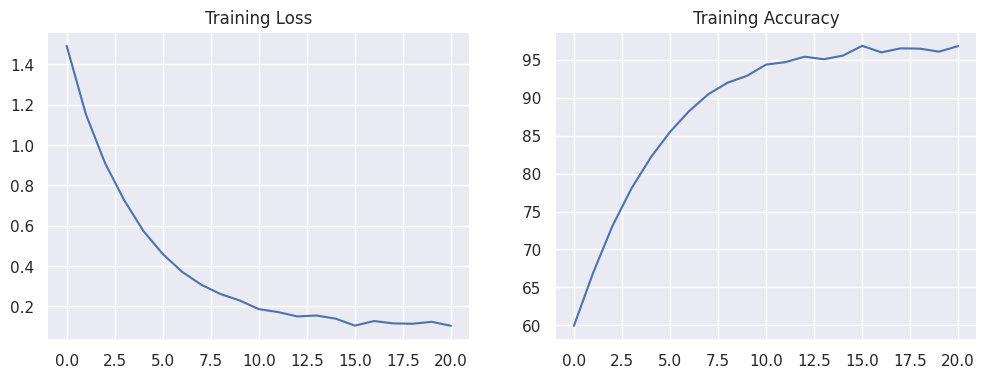

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax1.plot(training_loss)
ax2.plot(training_acc)

ax1.set_title("Training Loss")
ax2.set_title("Training Accuracy")

In [54]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score

with torch.no_grad():
    all_preds = []
    all_labels = []
    batch_test_loss = []

    for tex_x, test_y in test_loader:
        batch_size = tex_x.shape[0]
        ht = torch.zeros(hidden_layers, batch_size, hidden_dim).to(device)
        ct = torch.zeros(hidden_layers, batch_size, hidden_dim).to(device)
        hidden_inputs = (ht, ct)

        outputs, hidden_outputs = model(tex_x, hidden_inputs)

        # Compute loss
        loss = loss_fun(outputs, test_y)
        batch_test_loss.append(loss.item())

        outputs = outputs.cpu()
        test_y = test_y.cpu()

        # Predictions and true labels
        predictions = torch.argmax(outputs, axis=1)
        all_preds.extend(predictions.cpu().numpy())
        all_labels.extend(test_y.cpu().numpy())

    # Compute metrics
    test_loss = np.mean(batch_test_loss)
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')  # Use 'weighted' for class imbalance
    recall = recall_score(all_labels, all_preds, average='weighted')

    # Display classification report for detailed metrics per class
    # report = classification_report(all_labels, all_preds)

    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print(f"Test F1-Score: {f1:.2f}")
    print(f"Test Recall: {recall:.2f}")
    # print("\nClassification Report:\n", report)


Test Loss: 0.6023041038059218
Test Accuracy: 87.08%
Test F1-Score: 0.87
Test Recall: 0.87


In [58]:
import pickle

pickle.dump(model, open('words_model.pkl', 'wb'))
pickle.dump(std_scaler, open('words_std_scaler.pkl', 'wb'))
pickle.dump(encoder, open('words_labelencoder.pkl', 'wb'))

In [60]:
encoder.classes_

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'AFRAID',
       'ANGRY', 'APPRECIATE', 'B', 'BAD', 'BED', 'BORED', 'C', 'CLASS',
       'COLD', 'COLLEGE_SCHOOL', 'COMB', 'COME', 'CONGRATULATIONS',
       'CRYING', 'D', 'DARE', 'DIFFERENCE', 'DISAPPOINTED', 'DO', 'E',
       'F', 'FAVOUR', 'FEVER', 'FINE', 'FOOD', 'FREE', 'FRIEND', 'FROM',
       'G', 'GO', 'GOOD', 'GRATEFUL', 'H', 'HAD', 'HAPPY', 'HEAR',
       'HEART', 'HELLO_HI', 'HELP', 'HIDING', 'HOW', 'HUNGRY', 'HURT',
       'I', 'I_ME_MINE_MY', 'J', 'K', 'KIND', 'L', 'LEAVE', 'LIKE_LOVE',
       'M', 'MEAN IT', 'MEDICINE', 'MEET', 'N', 'NAME', 'NICE', 'O',
       'OLD_AGE', 'OUTSIDE', 'P', 'PHONE', 'PLACE', 'POUR', 'PREPARE',
       'PROMISE', 'Q', 'R', 'REALLY', 'REPEAT', 'ROOM', 'S', 'SHIRT',
       'SITTING', 'SLEEP', 'SLOWER', 'SO MUCH', 'SOFTLY', 'SOME ONE',
       'SOMETHING', 'SORRY', 'SPEAK', 'STOP', 'SURE', 'T', 'TAKE CARE',
       'TAKE TIME', 'TALK', 'TELL', 'THANK', 'THAT', 'THINGS', 'THINK',
       'THIRST

In [57]:
# original_labels = encoder.inverse_transform(targets)
# original_labels